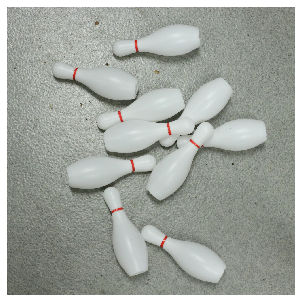

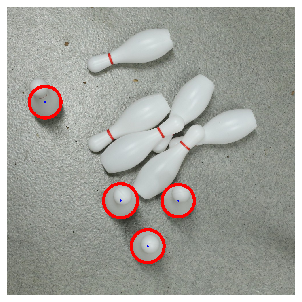

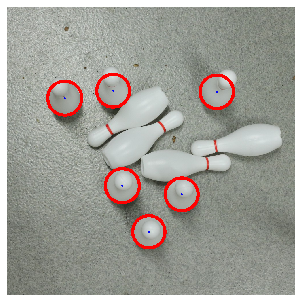

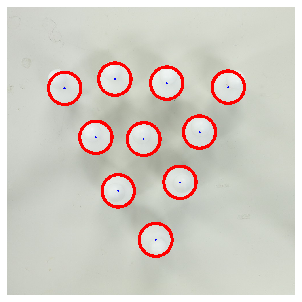

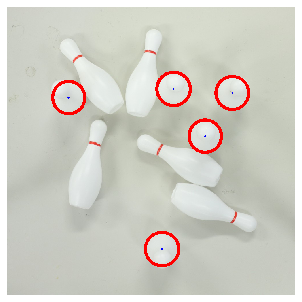

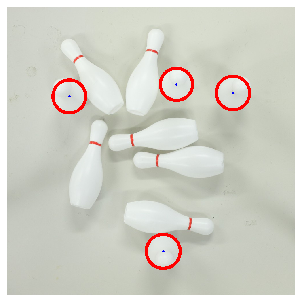

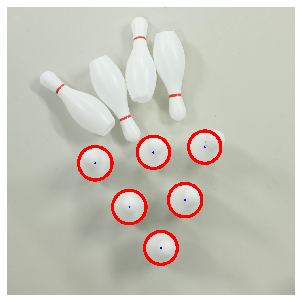

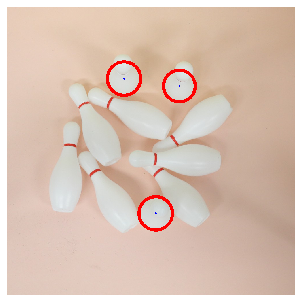

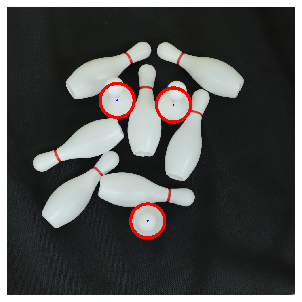

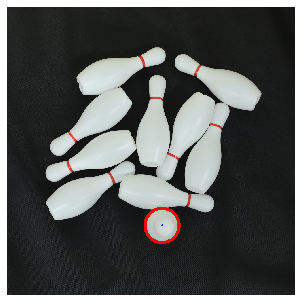

[0, 4, 6, 10, 5, 4, 6, 3, 3, 1]
10
正解数 10 / 10
正解率 100.0 %


In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import glob
from natsort import natsorted
from statistics import mean

#ボーリング画像の取得. 
files = natsorted( glob.glob("IMAGE/TEST/LEVEL4_TEST_USE2/*") )
path = "/Users/higuchidaiki/Desktop/ボーリング画像認識/ImageProcessing/OUTPUT/TEST_OUTPUT/" 

#立っているピンの数を格納する.
output = []
num = 0
miss =[]
#全ての画像に対して順に円検出処理を行う.
for f in files:
    
    img_gray = cv2.imread(f, 0)
    #バイラテラルフィルタより, HoughCirclesのパターメータを検出精度が高くなるように設定できた.
    #カーネルサイズは高い方が, ピン以外のエッジを検出しなくなる. 計算量も踏まえ１１とした.
    img_gray = cv2.medianBlur(img_gray, 11)  
    
    #円の印をつける画像をRGB表示するために読み込む.
    img_BGR = cv2.imread(f)
    cimg = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB) 
    
    #ハフ変換による円検出.
    circles = cv2.HoughCircles(
        img_gray,                      
        cv2.HOUGH_GRADIENT,
        1,                     
        50,                   
        param1=10,     #閾値を下げることで検出するエッジの数を増やした. 
        param2=30,     #高い方が誤検出を防げるので, 円をミスしない範囲で大きい値とした. 30
        minRadius=50, #円の半径の最大最小は事前に調べて範囲を絞った.
        maxRadius=60 
    )
    
    if circles is not None:
        #円が検出できた
            circles = np.uint16(np.around(circles))
            for i in circles[0,:]:
                #pixelvalue = img_BGR[ i[1], i[0] ]
                #if mean(pixelvalue) > 180 :
                    # 囲み線を描く
                    cv2.circle(cimg,(i[0], i[1]), i[2], (255, 0, 0), 10)
                    # 中心点を描く
                    cv2.circle(cimg,(i[0], i[1]), 2, (0,0,255), 3)
                #else:
                  #  num = num + 1
            #出力を保存.
            #miss.append(num)
            #num = 0
            output.append(circles.shape[1])
            #print("立っているピンの数",circles.shape[1]-miss, "本")
    else: 
        #円が検出できなかった.
        #miss.append(0)
        output.append(0)
        #print("立っているピンの数", "0", "本")
        
    #描画する. 
    plt.imshow(cimg)
    
    ###未解決###
    #Dirの全ての画像が置き換わっちゃう. つまり元画像が上書きされるからpathを指定しようと思ったけど
    #それがうまく行かない
    #とりあえず対症療法的に, 上書きされても良いから画像を作ろう.
    #プレゼン作るときには, 軸とか邪魔だね.
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    plt.axis('off')
    #plt.gca().spines['right'].set_visible(False)
    #plt.gca().spines['left'].set_visible(False)
    #plt.gca().spines['top'].set_visible(False)
    #plt.gca().spines['bottom'].set_visible(False)
    plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
    plt.tick_params(bottom=False, left=False, right=False, top=False)
    plt.savefig(f, bbox_inches="tight",dpi=300, pad_inches=0.0,transparent = True)
    plt.show()

#出力から誤検出した数を除いた結果.
#result = []
#for i in range (0, len(output)):
  #  result.append(output[i]-miss[i])

#結果を正解と比較する.
Answer_data = open("ANS_TXT/LEVEL4_TEST_ANS.txt", "r")
lines = Answer_data.readlines()

#正解データを格納する.
Ans = []
for i in range (0,len(lines)):
    Ans.append(int(lines[i]))
print(Ans)
print(len(Ans))
Answer_data.close()

#正解数を格納する.
flag = 0
for i in range (0,len(lines)):
    if output[i] == Ans[i]:
        flag = flag + 1
print("正解数", flag, "/", len(lines))
print("正解率", 100 * flag / len(lines), "%" )

#出力結果の保存.
#f = open('LEVEL6_MyResult.txt', 'w')
#for x in result:
  #  f.write(str(x) + "\n")
#f.close()

In [ ]:
print("出力", output)
print("ミス",miss)
print("認識した数",result)
print()
print("正解",Ans)